### (1) Demonstrating Python modules and data structures that can be used to efficiently work with Twitter data

The following python modules can be used to efficiently work with Twitter data:

tweepy (this module will be used in this notebook for our demonstration of the Twitter API for Python)

Python Twitter Tools

python-twitter

twython

TwitterAPI

TwitterSearch

Source: https://stackabuse.com/accessing-the-twitter-api-with-python/
  

Data structures used in the Python API for Twitter
    
Typically, Twitter data is pulled using the JSON data structure which you would have to parse either into csv or a pandas dataframe, depending on your purpose of the results.

In the module used in this demonstration (Tweepy), tweets are pulled as tweepy objects. These objects are then converted into json so that we can parse through keys and values easier to gather tweet metadata.

### (2) Using the Twitter API for Python to download tweets, search tweets by hashtags, extract metadata (i.e. number of reteweets, etc.)

#### Import the necessary libraries

In [1]:
!pip install tweepy
import tweepy as tw
import datetime
import tweepy
import csv

#### State the keys to authenticate to the Twitter API. You will need to setup and be approved for a Developer account in order to receive these keys.

In [2]:
consumer_key= 'crdecmmwhUaTV7oitShaB7xlV'
consumer_secret= 'pEE16H07j9ygOmaxPyJBlW9LUZIrkjOwSyBwhk3DWTS5yZKzEX'
access_token= '1242649299978256389-Ba9M1Nudxuue16nFtGAXuzPk5NNnja'
access_token_secret= 'Skqz04ZBTGAob4K61cHBSay3myFyGLJiCUFPjd7rxyEIk'


#### Authenticate to your Twitter App  

In [3]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

     
users = api.me()
print(users)

User(_api=<tweepy.api.API object at 0x000002AF392B9B20>, _json={'id': 1242649299978256389, 'id_str': '1242649299978256389', 'name': 'Rohith', 'screen_name': 'rohith_so', 'location': 'Toronto, Canada', 'profile_location': None, 'description': 'PhD researcher in Machine Learning @UofT and Cloud security Engineer @Deloitte', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': True, 'followers_count': 3, 'friends_count': 63, 'listed_count': 0, 'created_at': 'Wed Mar 25 03:07:47 +0000 2020', 'favourites_count': 5, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 0, 'lang': None, 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': 'F5F8FA', 'profile_background_image_url': None, 'profile_background_image_url_https': None, 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/1257200110250921984/a2rubQEa_normal.jpg', 'profile_im

#### Search through tweets by hashtags

In [4]:
# Define the search term and the date_since date as variables
search_hashtag = "#wildfires"
date_since = "2018-11-16"

# Collect tweets
tweets = tw.Cursor(api.search,
              q=search_hashtag,
              lang="en",
              since=date_since).items(5)
print(tweets)

# Iterate and print tweets
for tweet in tweets:
    print(tweet.id, tweet.text)

1323535350434734080 RT @ForestServiceNW: The #wildfires around the Pacific NW may be contained, but there will be years' worth of work to be done to repair inf…
1323535215575371778 RT @jramireztsyl: I just ran the numbers for today's #RSFire2020. To date, we have done 30.6 billion simulations of virtual #wildfires in #…
1323534912754982917 RT @jramireztsyl: I just ran the numbers for today's #RSFire2020. To date, we have done 30.6 billion simulations of virtual #wildfires in #…
1323531722189799424 People going through 2020 wondering how it all happened without even considering everything that has happened is a… https://t.co/fBHcPo5TPN
1323523893248753665 RT @abstractwallart: California #artist Danielle Nelisse paints #abstract landscape #paintings of #daniellenelisse #wildfires | thank you #…


#### Extract metadata (i.e. number of retweets etc.)

In [5]:
#Extracting the full text of a retweeted status of a given tweet ID by first checking if the tweet has been retweeted
import json
id = "1265889240300257280"
status = api.get_status(id, tweet_mode="extended")
try:
    print(status.retweeted_status.full_text)
except AttributeError: # Not a Retweet
    print(status.full_text)

#Convert the tweet status into JSON so we can parse the dict keys and gather underlying metadata
json_str = json.dumps(status._json)
metadata = (json.loads(json_str))
metadata


Are you a coding fanatic who wants to work with us and learn new technologies? 👨‍💻👩‍💻
Well then, we are looking just for you!

Register for our SDE Hiring Challenge right now!
https://t.co/Zg08gHhT0W  

#hiring #challenge #coding #programming https://t.co/1N7gXaH9eA


{'created_at': 'Thu May 28 06:14:48 +0000 2020',
 'id': 1265889240300257280,
 'id_str': '1265889240300257280',
 'full_text': 'Are you a coding fanatic who wants to work with us and learn new technologies? 👨\u200d💻👩\u200d💻\nWell then, we are looking just for you!\n\nRegister for our SDE Hiring Challenge right now!\nhttps://t.co/Zg08gHhT0W  \n\n#hiring #challenge #coding #programming https://t.co/1N7gXaH9eA',
 'truncated': False,
 'display_text_range': [0, 242],
 'entities': {'hashtags': [{'text': 'hiring', 'indices': [203, 210]},
   {'text': 'challenge', 'indices': [211, 221]},
   {'text': 'coding', 'indices': [222, 229]},
   {'text': 'programming', 'indices': [230, 242]}],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/Zg08gHhT0W',
    'expanded_url': 'https://practice.geeksforgeeks.org/contest/hiring-challenge-sde',
    'display_url': 'practice.geeksforgeeks.org/contest/hiring…',
    'indices': [176, 199]}],
  'media': [{'id': 1265887151016812546,
    'id_str

In [6]:
#Gather the keys of the tweet's metadata
metadata.keys()

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])

In [7]:
#Gather the user of the tweet
user = metadata['user']['name']
#Gather the location of a user's tweet
user_location = metadata['user']['location']

#Gather the time the tweet was made
created_at = metadata['created_at']

#Gather details about the user's followers and friends
number_of_followers = metadata['user']['followers_count']
number_of_friends = metadata['user']['friends_count']

print("The tweet was created at",created_at,"by the user",user,"from",user_location,"\nThis user has",number_of_followers,"followers and",number_of_friends,"friends")



The tweet was created at Thu May 28 06:14:48 +0000 2020 by the user GeeksforGeeks from India 
This user has 20783 followers and 22 friends


In [8]:
#printing the number of retweets for a tweet 
retweets_list = api.retweets(id) 

number_of_retweets = len(retweets_list)
print("\nBased on the Tweet ID, there were:", number_of_retweets, "retweets found")


Based on the Tweet ID, there were: 7 retweets found


In [9]:
# printing the screen names of the retweeters of the given tweet id
for retweet in retweets_list: 
    print(retweet.user.screen_name) 
    


harshitabambure
codedailybot
UVahalkar
codedailybot
ProjectLearn_io
codedailybot
AaronCuddeback


In [10]:
csvFile = open('ua.csv', 'a')
#Use csv Writer
csvWriter = csv.writer(csvFile)

for tweet in tweepy.Cursor(api.search,q="#unitedAIRLINES",count=100,
                           lang="en",
                           since="2017-04-03").items():
    print (tweet.created_at, tweet.text)
    csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8')])

2020-11-03 04:59:09 United moving flight crews out of city hotels ahead of election to ensure 'safety and suitable rest'… https://t.co/u6fpCHDD1U
2020-11-03 04:51:36 United Airlines Moves To Contactless Onboard Payments, Will Resume Buy-On-Board Service https://t.co/ylaz4awGEJ… https://t.co/uVLOmUZO5b
2020-11-03 04:04:01 RT @Supermom2020: #UnitedAirlines moves flight crews to airport hotels ahead of #election
https://t.co/5o2YwRxOci #Travel #Avgeek
2020-11-03 04:01:56 RT @Supermom2020: #UnitedAirlines moves flight crews to airport hotels ahead of #election
https://t.co/5o2YwRxOci #Travel #Avgeek
2020-11-03 03:51:48 #UnitedAirlines moves flight crews to airport hotels ahead of #election
https://t.co/5o2YwRxOci #Travel #Avgeek
2020-11-03 00:48:53 In other words and to my prior point, don’t fly #unitedairlines @united. https://t.co/ydh08teADh
2020-11-03 00:26:49 My face when I found out I had a whole row to myself...
•
•
•
•
#travel #flying #shaydo #airport #skies… https://t.co/U5xRbtmrzL

### (3) Using the Twitter API to download tweets and save those as a csv file

Here, we search for the last 100 tweets made using the hashtag "#Trump" and save these tweets to a csv along with metadata of those tweets: username/screen name, id of the tweet, whether it was retweeted, language of the tweet, number of followers of the user, whether the user is verified, location the tweet was made in, the tweet, and when it was created. Our search results are then saved to a csv file.

In [11]:
#method to get a user's last tweets
def get_tweets(hashtag):

 

    #set count to however many tweets you want
    number_of_tweets = 100

    #get tweets
    tweets_for_csv = []
    for tweet in tweepy.Cursor(api.search, q = hashtag).items(number_of_tweets):
        #create array of tweet information: username, tweet id, date/time, text
        tweets_for_csv.append([tweet.user.screen_name,tweet.retweeted,tweet.user.statuses_count,tweet.user.followers_count,tweet.user.verified,tweet.user.location.encode("utf-8"), tweet.created_at, tweet.text.encode("utf-8")])

    #write to a new csv file from the array of tweets
    outfile = "hashtag_tweets.csv"
    print ("tweets have been saved to the following csv file:" + outfile)
    with open(outfile, 'w+') as file:
        writer = csv.writer(file, delimiter=',')
        writer.writerows(tweets_for_csv)

if __name__ == '__main__':
    get_tweets("#Trump")

tweets have been saved to the following csv file:hashtag_tweets.csv


### (4) Basic feature extraction and basic text preprocessing on tweets from csv file

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
import matplotlib.pyplot as plt
pd.options.display.max_colwidth = 200
%matplotlib inline
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dijia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [148]:
df = pd.read_csv("hashtag_tweets.csv",index_col=False, names=["user_name","retweeted_or_not", "number_Tweets_issued", "num_followers", "verified_or_not", "location_the_tweet", "when_the_tweet_created", "text" ]) 
df.iloc[5:9]

,user_name,retweeted_or_not,number_Tweets_issued,num_followers,verified_or_not,location_the_tweet,when_the_tweet_created,text
5,thomasmountain5,False,3649,576,False,b'',2020-11-03 08:17:05,"b'@murray_nyc @realDonaldTrump A vote for #Trump is a vote for bigotry, for #racism, and for intolerance.'"
6,Schokobub2,False,5027,211,False,b'',2020-11-03 08:17:04,"b'RT @Dakotadamus: $10,000 cash give giveaway: If either Presidential Candidate gets 366 or more electoral votes (Obama had 365 in 2008) in #\xe2\x80\xa6'"
7,cri_marcucci,False,18083,280,False,"b'Roma, Lazio'",2020-11-03 08:17:02,"b'RT @_Nico_Piro_: Una #NewYork mai vista cos\xc3\xac: transenne, tavole di legno sulle vetrine dei negozi (non solo sulla quinta, non solo negozi d\xe2\x80\xa6'"
8,elsolespanol,False,105,51,False,"b'Valencia, Espa\xc3\xb1a \xf0\x9f\x87\xaa\xf0\x9f\x87\xb8'",2020-11-03 08:17:02,"b'When Biden wins tonight, what is that fucking maniac Trump going to do?\n\n#Election2020 #Trump #Biden\xe2\x80\xa6 https://t.co/rgyDcuY9I6'"


In [170]:
df1=df[['text']].copy()

## Tweet text  Preprocessing 
Since we are dealing with tweets, we need to do specific tweet text cleaning along with normal text pre-processing. A tweet may contains

- URL's
- Mentions
- Hashtags
- Emojis
- Smileys
- Spefic words etc..



To clean the tweet , we can use a python library tweet-preprocessor instead of writing the cleaning logic ourself.

In [171]:
# Install tweet-preprocessor 
!pip install tweet-preprocessor

In [172]:
import preprocessor as p

# celan the text
def preprocess_tweet(row):
    text = row['text']
    text = p.clean(text)
    return text

In [173]:
df1['text_embed_Preprocessor'] = df1.apply(preprocess_tweet, axis=1)

In [174]:
#Tweet has been cleaned to normal text.
df1.loc[6:9]

,text,text_embed_Preprocessor
6,"b'RT @Dakotadamus: $, cash give giveaway: If either Presidential Candidate gets or more electoral votes (Obama had in ) in #\\\'","b'RT : $, cash give giveaway: If either Presidential Candidate gets or more electoral votes (Obama had in ) in \\\'"
7,"b'RT @_Nico_Piro_: Una #NewYork mai vista cos\\xac: transenne, tavole di legno sulle vetrine dei negozi (non solo sulla quinta, non solo negozi d\\\'","b'RT : Una mai vista cos\\xac: transenne, tavole di legno sulle vetrine dei negozi (non solo sulla quinta, non solo negozi d\\\'"
8,"b'When Biden wins tonight, what is that fucking maniac Trump going to do?\n\n# #Trump #Biden\\\ https://t.co/'","b'When Biden wins tonight, what is that fucking maniac Trump going to do?\n\n \\\ '"
9,"b""Thru all my years of voting, I've always seen yard signs for candidates\n\nBut NOT this year\\\\\n\nI believe people ar\\\ https://t.co/""","b""Thru all my years of voting, I've always seen yard signs for candidates\n\nBut NOT this year\\\\\n\nI believe people ar\\\ """


In [175]:
'''banned = [u"\U0001F600-\U0001F64F".encode("utf-8"), 
          u"\U0001F300-\U0001F5FF".encode("utf-8"),  # symbols & pictographs
          u"\U0001F680-\U0001F6FF".encode("utf-8"), # transport & map symbols
          u"\U0001F1E0-\U0001F1FF".encode("utf-8"), # flags (iOS)
         ]
df["Text"].apply(lambda x: [item for item in x if item not in banned])'''

'banned = [u"😀-🙏".encode("utf-8"), \n          u"🌀-🗿".encode("utf-8"),  # symbols & pictographs\n          u"🚀-\U0001f6ff".encode("utf-8"), # transport & map symbols\n          u"\U0001f1e0-🇿".encode("utf-8"), # flags (iOS)\n         ]\ndf["Text"].apply(lambda x: [item for item in x if item not in banned])'

### Now we can apply normal text preprocessing like

- Lowercasing
- Punctuation Removal
- Replace extra white spaces
- Stopwords removal

In [176]:
!pip install gensim
from gensim.parsing.preprocessing import remove_stopwords

In [177]:
def stopword_removal(row):
    text = row['text']
    text = remove_stopwords(text)
    return text

In [178]:
df1['text_after_preprocess'] = df1.apply(stopword_removal, axis=1)
df1.head()

,text,text_embed_Preprocessor,text_after_preprocess
0,"b'Meine Hoffnung:\nmit einem Ende der \\ #Trump beg\\ in der Folge auch das Ende von #Johnson / UK , der AfD bei un\\\ https://t.co/'","b'Meine Hoffnungnmit einem Ende der \\ beg\\ in der Folge auch das Ende von / UK , der AfD bei un\\\ '","b'Meine Hoffnung:\nmit einem Ende der \\ #Trump beg\\ der Folge auch das Ende von #Johnson / UK , der AfD bei un\\\ https://t.co/'"
1,"b'@realDonaldTrump I\'m Here To Tell You That COVID Is Real and It\'s No Joke, as Trump Mocks it to be...\n#Trump, ""The\\\ https://t.co/'","b' I\'m Here To Tell You That COVID Is Real and It\'s No Joke, as Trump Mocks it to be...\n, ""The\\\ '","b'@realDonaldTrump I\'m Here To Tell You That COVID Is Real It\'s No Joke, Trump Mocks be...\n#Trump, ""The\\\ https://t.co/'"
2,"b""RT @ChenapanVilain: #ElectionDay #Trump #Biden \nJ'ai peur les amis. Subitement, je me mets \\ douter.\nLe lavage de cerveau m\\ commen\\\""","b""RT : \nJ'ai peur les amis. Subitement, je me mets \\ douter.\nLe lavage de cerveau m\\ commen\\\""","b""RT @ChenapanVilain: #ElectionDay #Trump #Biden \nJ'ai peur les amis. Subitement, je mets \\ douter.\nLe lavage cerveau m\\ commen\\\"""
3,"b""Remember folks, there is no backup America. Once she falls, there's no going back. \n\n#Trump # #DonaldTrump""","b""Remember folks, there is no backup America. Once she falls, there's no going back. \n\n ""","b""Remember folks, backup America. Once falls, there's going back. \n\n#Trump # #DonaldTrump"""
4,"b'""I Love Covid-."" - Donald Trump \\\\xba\\\\\\\\xef\\ #MAGA # #Trump # # https://t.co/'","b'""I Love Covid-."" - Donald Trump \\\\xba\\\\\\\\xef\\ '","b'""I Love Covid-."" - Donald Trump \\\\xba\\\\\\\\xef\\ #MAGA # #Trump # # https://t.co/'"


### Remove extra white spaces, punctuation and apply lower casing

In [179]:
df1['text_after_preprocess'] = df1['text_after_preprocess'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')
df1.loc[1]

text                       b'@realDonaldTrump I\'m Here To Tell You That COVID Is Real and It\'s No Joke, as Trump Mocks it to be...\n#Trump, "The\\\ https://t.co/'
text_embed_Preprocessor                                       b' I\'m Here To Tell You That COVID Is Real and It\'s No Joke, as Trump Mocks it to be...\n, "The\\\ '
text_after_preprocess                                  b realdonaldtrump i m here to tell you that covid is real it s no joke trump mocks be n trump the https t co 
Name: 1, dtype: object

In [180]:
#remove Emoji from the words (remove all words which contains number)
import re
e=[]
for i in range(0,100):
    string=df1['text_after_preprocess'].loc[i]
    e.append(re.sub(r'\w*\d\w*', '', string).strip())

#create new df 
df3 = pd.DataFrame({'text':e})
#add column to existing df 
df1['text_after_preprocess'] = e

In [ ]:
'''#remove Emoji from the words (remove all words which contains number)
import re
e=[]
for i in range(0,100):
    string=df['text'].loc[i]
    e.append(re.sub(r'\w*\d\w*', '', string).strip())

#create new df 
df1 = pd.DataFrame({'text':e})
#add column to existing df 
df['text'] = e'''

In [181]:
df1['text_after_preprocess'] = df1['text_after_preprocess'].str[1:]


In [185]:
df1['text_after_preprocess'] =df1['text_after_preprocess'].str.replace(r'xba', '')
df1['text_after_preprocess']=df1['text_after_preprocess'].str.replace(r'xbb', '')
df1['text_after_preprocess'] =df1['text_after_preprocess'].str.replace(r'xac', '')
df1['text_after_preprocess'] =df1['text_after_preprocess'].str.replace(r'xef', '')
df1['text_after_preprocess'] =df1['text_after_preprocess'].str.replace(r'xbf', '')
df1['text_after_preprocess'] =df1['text_after_preprocess'].str.replace(r'xbd', '')
df1['text_after_preprocess'] =df1['text_after_preprocess'].str.replace(r'xbe', '')
df1['text_after_preprocess']=df1['text_after_preprocess'].str.replace(r'rt', '')
df1.loc[4:9]

,text,text_embed_Preprocessor,text_after_preprocess
4,"b'""I Love Covid-."" - Donald Trump \\\\xba\\\\\\\\xef\\ #MAGA # #Trump # # https://t.co/'","b'""I Love Covid-."" - Donald Trump \\\\xba\\\\\\\\xef\\ '",i love covid donald trump maga trump https t co
5,"b'@murray_nyc @realDonaldTrump A vote for #Trump is a vote for bigotry, for #racism, and for intolerance.'","b' A vote for is a vote for bigotry, for , and for intolerance.'",murray_nyc realdonaldtrump a vote trump vote bigotry racism intolerance
6,"b'RT @Dakotadamus: $, cash give giveaway: If either Presidential Candidate gets or more electoral votes (Obama had in ) in #\\\'","b'RT : $, cash give giveaway: If either Presidential Candidate gets or more electoral votes (Obama had in ) in \\\'",dakotadamus cash giveaway if presidential candidate gets electoral votes obama
7,"b'RT @_Nico_Piro_: Una #NewYork mai vista cos\\xac: transenne, tavole di legno sulle vetrine dei negozi (non solo sulla quinta, non solo negozi d\\\'","b'RT : Una mai vista cos\\xac: transenne, tavole di legno sulle vetrine dei negozi (non solo sulla quinta, non solo negozi d\\\'",_nico_piro_ una newyork mai vista cos transenne tavole di legno sulle vetrine dei negozi non solo sulla quinta non solo negozi d
8,"b'When Biden wins tonight, what is that fucking maniac Trump going to do?\n\n# #Trump #Biden\\\ https://t.co/'","b'When Biden wins tonight, what is that fucking maniac Trump going to do?\n\n \\\ '",when biden wins tonight fucking maniac trump going do n n trump biden https t co
9,"b""Thru all my years of voting, I've always seen yard signs for candidates\n\nBut NOT this year\\\\\n\nI believe people ar\\\ https://t.co/""","b""Thru all my years of voting, I've always seen yard signs for candidates\n\nBut NOT this year\\\\\n\nI believe people ar\\\ """,thru years voting i ve seen yard signs candidates n nbut not year n ni believe people ar https t co


## Feature Extraction

In [108]:
df['word_count'] = df['text'].apply(lambda x: len(str(x).split(" ")))
df[['text','word_count']].iloc[5:9]

,text,word_count
5,a vote vote bigotry intolerance,6
6,cash giveaway if presidential candidate gets electoral votes obama,13
7,una mai vista cos transenne tavole di legno sulle vetrine dei negozi non solo sulla quinta non solo negozi d,24
8,when biden wins tonight fucking maniac trump going do n n,12


In [99]:
!pip install wordcloud

(-0.5, 399.5, 199.5, -0.5)

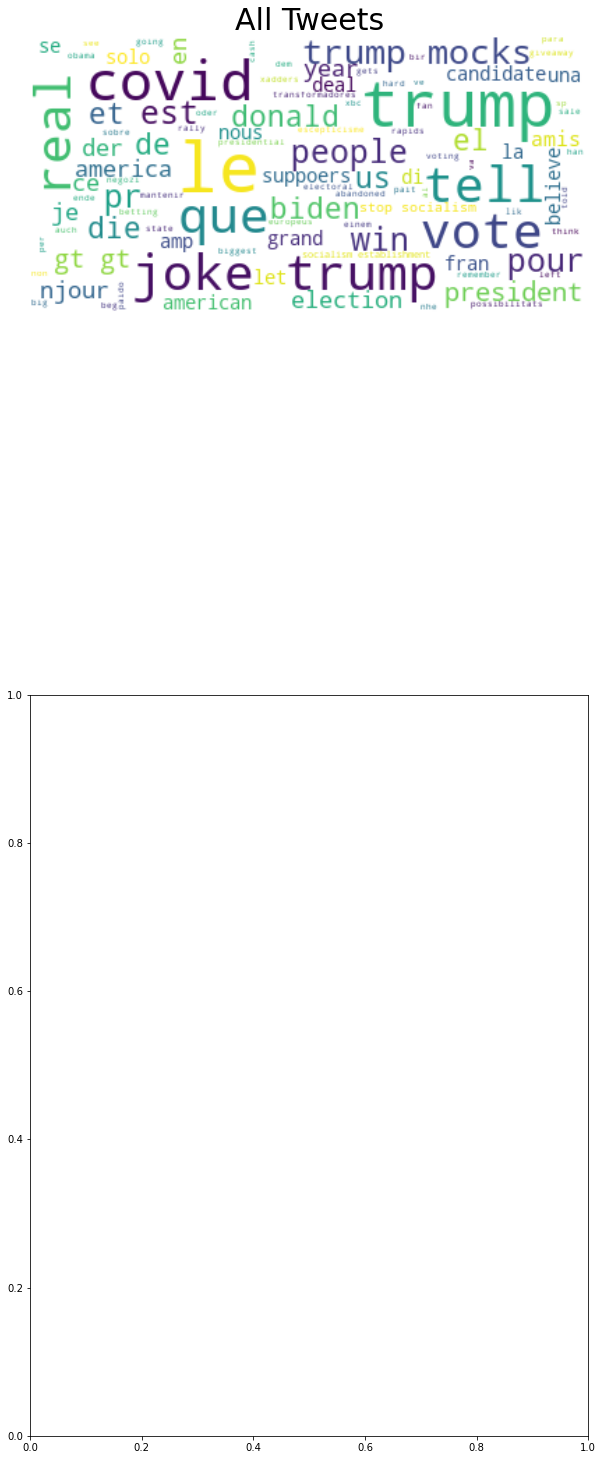

In [103]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
# Start with one review:
df_ADR = df[df['text']==1]
df_NADR = df[df['text']==0]
tweet_All = " ".join(review for review in df.text)
tweet_ADR = " ".join(review for review in df_ADR.text)
tweet_NADR = " ".join(review for review in df_NADR.text)

fig, ax = plt.subplots(2, 1, figsize  = (10,30))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)
#wordcloud_ADR = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_ADR)
#wordcloud_NADR = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_NADR)

# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=30)
ax[0].axis('off')


In [115]:
def tokenization(text):
    text = re.split('\W+', text)
    return text
df['Tweet_tokenized'] = df['text'].apply(lambda x: tokenization(x.lower()))
df1=df[['text','word_count','Tweet_tokenized']]
df1.iloc[5:9]

,text,word_count,Tweet_tokenized
5,a vote vote bigotry intolerance,6,"[, a, vote, vote, bigotry, intolerance]"
6,cash giveaway if presidential candidate gets electoral votes obama,13,"[, cash, giveaway, if, presidential, candidate, gets, electoral, votes, obama]"
7,una mai vista cos transenne tavole di legno sulle vetrine dei negozi non solo sulla quinta non solo negozi d,24,"[, una, mai, vista, cos, transenne, tavole, di, legno, sulle, vetrine, dei, negozi, non, solo, sulla, quinta, non, solo, negozi, d]"
8,when biden wins tonight fucking maniac trump going do n n,12,"[, when, biden, wins, tonight, fucking, maniac, trump, going, do, n, n]"


In [137]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# create an instance of countvectorizer
vect = CountVectorizer()  # shift tab 